In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c81d73dbe371b3be20cb667ce7cf2b7a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | broken hill
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | shache
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | sur
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | esterhazy
Processing Record 10 of Set 1 | udachnyy
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | chagda
City not found. Skipping...
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | vestmanna
Processing Record 22 of S

Processing Record 33 of Set 4 | broome
Processing Record 34 of Set 4 | port macquarie
Processing Record 35 of Set 4 | quatre cocos
Processing Record 36 of Set 4 | vila franca do campo
Processing Record 37 of Set 4 | nemuro
Processing Record 38 of Set 4 | hithadhoo
Processing Record 39 of Set 4 | plouzane
Processing Record 40 of Set 4 | kaitangata
Processing Record 41 of Set 4 | rawah
Processing Record 42 of Set 4 | camacha
Processing Record 43 of Set 4 | dunedin
Processing Record 44 of Set 4 | port lincoln
Processing Record 45 of Set 4 | cayenne
Processing Record 46 of Set 4 | abu samrah
Processing Record 47 of Set 4 | hamilton
Processing Record 48 of Set 4 | sataua
City not found. Skipping...
Processing Record 49 of Set 4 | bievre
Processing Record 50 of Set 4 | kloulklubed
Processing Record 1 of Set 5 | hervey bay
Processing Record 2 of Set 5 | dudinka
Processing Record 3 of Set 5 | ulaangom
Processing Record 4 of Set 5 | kirkconnel
Processing Record 5 of Set 5 | la ronge
Processing 

Processing Record 25 of Set 8 | pilar
Processing Record 26 of Set 8 | iquitos
Processing Record 27 of Set 8 | vila velha
Processing Record 28 of Set 8 | alice springs
Processing Record 29 of Set 8 | moyale
Processing Record 30 of Set 8 | zaoyang
Processing Record 31 of Set 8 | urumqi
Processing Record 32 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 33 of Set 8 | patan
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | nha trang
Processing Record 36 of Set 8 | bethel
Processing Record 37 of Set 8 | litoral del san juan
City not found. Skipping...
Processing Record 38 of Set 8 | wilkie
Processing Record 39 of Set 8 | misratah
Processing Record 40 of Set 8 | belmonte
Processing Record 41 of Set 8 | chiredzi
Processing Record 42 of Set 8 | alofi
Processing Record 43 of Set 8 | kropotkin
Processing Record 44 of Set 8 | punta alta
Processing Record 45 of Set 8 | newport
Processing Record 46 of Set 8 | puerto escondido
Processing Record 47 of Set 8 

Processing Record 16 of Set 12 | lahad datu
Processing Record 17 of Set 12 | chapais
Processing Record 18 of Set 12 | richard toll
City not found. Skipping...
Processing Record 19 of Set 12 | pisco
Processing Record 20 of Set 12 | labuan
Processing Record 21 of Set 12 | tabuk
Processing Record 22 of Set 12 | port blair
Processing Record 23 of Set 12 | dryden
Processing Record 24 of Set 12 | salym
Processing Record 25 of Set 12 | dingle
Processing Record 26 of Set 12 | praia
Processing Record 27 of Set 12 | mogilno
Processing Record 28 of Set 12 | kerema
Processing Record 29 of Set 12 | flinders
Processing Record 30 of Set 12 | karakose
City not found. Skipping...
Processing Record 31 of Set 12 | athy
Processing Record 32 of Set 12 | fairbanks
Processing Record 33 of Set 12 | severo-yeniseyskiy
Processing Record 34 of Set 12 | puerto narino
Processing Record 35 of Set 12 | kupang
Processing Record 36 of Set 12 | petrivka
Processing Record 37 of Set 12 | melfort
Processing Record 38 of S

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.10,73,6,13.71,PF,2021-07-13 20:42:36
1,Ushuaia,-54.8000,-68.3000,35.26,80,75,6.91,AR,2021-07-13 20:42:37
2,Broken Hill,-31.9500,141.4333,60.51,41,40,14.97,AU,2021-07-13 20:42:37
3,Busselton,-33.6500,115.3333,49.05,81,42,15.59,AU,2021-07-13 20:42:37
4,Shache,38.4167,77.2406,76.73,32,100,7.34,CN,2021-07-13 20:42:38
5,Yellowknife,62.4560,-114.3525,74.28,40,20,1.99,CA,2021-07-13 20:42:38
6,Sur,22.5667,59.5289,85.17,73,100,11.10,OM,2021-07-13 20:37:47
7,Castro,-24.7911,-50.0119,58.46,65,14,2.57,BR,2021-07-13 20:42:39
8,Esterhazy,50.6500,-102.0843,81.45,38,42,4.56,CA,2021-07-13 20:42:39
9,Udachnyy,66.4167,112.4000,52.18,87,98,13.18,RU,2021-07-13 20:42:39


In [11]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-07-13 20:42:36,-23.1203,-134.9692,74.10,73,6,13.71
1,Ushuaia,AR,2021-07-13 20:42:37,-54.8000,-68.3000,35.26,80,75,6.91
2,Broken Hill,AU,2021-07-13 20:42:37,-31.9500,141.4333,60.51,41,40,14.97
3,Busselton,AU,2021-07-13 20:42:37,-33.6500,115.3333,49.05,81,42,15.59
4,Shache,CN,2021-07-13 20:42:38,38.4167,77.2406,76.73,32,100,7.34
5,Yellowknife,CA,2021-07-13 20:42:38,62.4560,-114.3525,74.28,40,20,1.99
6,Sur,OM,2021-07-13 20:37:47,22.5667,59.5289,85.17,73,100,11.10
7,Castro,BR,2021-07-13 20:42:39,-24.7911,-50.0119,58.46,65,14,2.57
8,Esterhazy,CA,2021-07-13 20:42:39,50.6500,-102.0843,81.45,38,42,4.56
9,Udachnyy,RU,2021-07-13 20:42:39,66.4167,112.4000,52.18,87,98,13.18


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

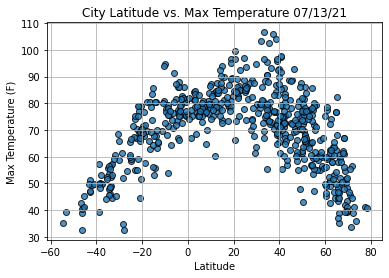

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

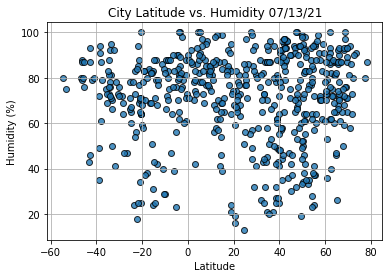

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

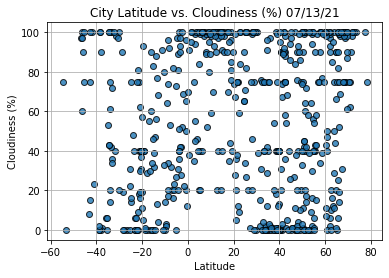

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

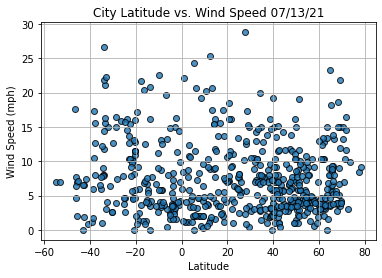

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

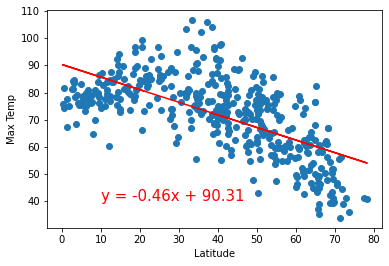

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

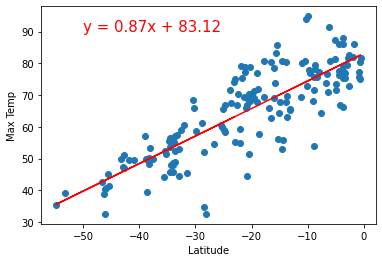

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

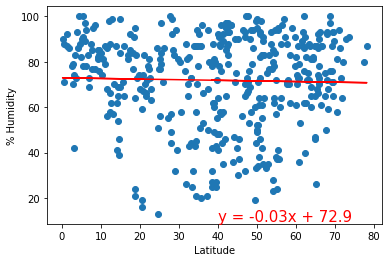

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

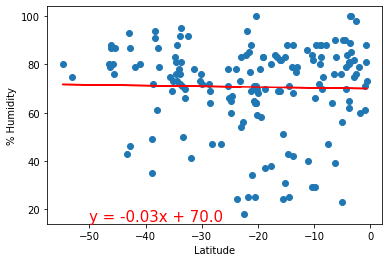

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50, 15))

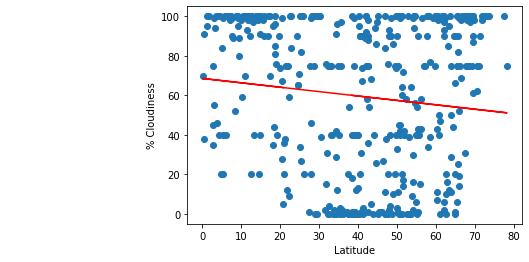

In [24]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50, 60))

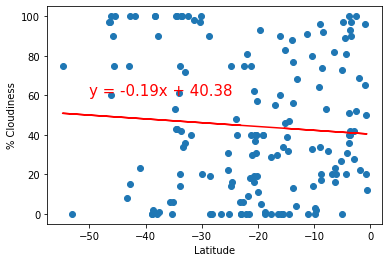

In [25]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50, 60))

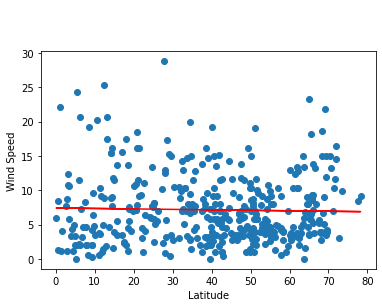

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

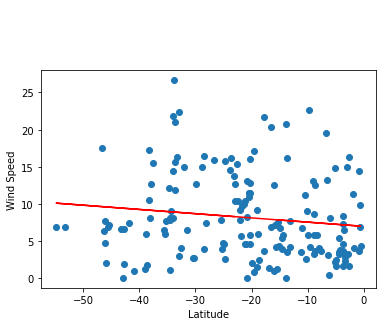

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))